# 2주차 과제 - 비지도 학습

이번 과제는 클러스터링과 차원 축소를 실습을 통해 이해하는 것을 목표로 합니다.

과제 1에서는 K-Means와 DBSCAN을 적용하여 두 클러스터링 알고리즘의 특징을 비교하고 주어진 데이터에 어떤 방법이 더 적절한지 분석합니다.
과제 2에서는 수업에서 학습한 차원 축소 기법을 직접 적용해 보며 각 방법이 데이터를 어떻게 변환하는지 시각적으로 확인합니다.

각 단계의 코드를 실행하고 결과를 관찰한 뒤 실험 결과를 바탕으로 제시된 문제에 답해주세요


# 과제1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN



#### 데이터 생성

In [2]:
X, y = make_moons(
    n_samples=200,
    noise=0.05,
    shuffle=True,
    random_state=0
)

#### 원본 데이터 시각화

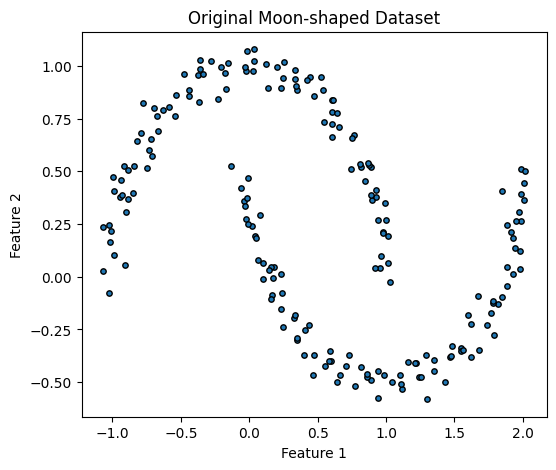

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=15, edgecolor='k')
plt.title("Original Moon-shaped Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### K-Means 기본 클러스터링 수행

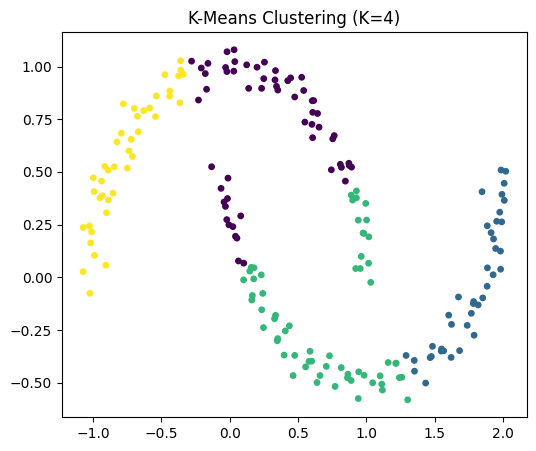

In [4]:
kmeans_basic = KMeans(n_clusters=4, random_state=0)
labels_basic = kmeans_basic.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_basic, cmap='viridis', s=15)
plt.title("K-Means Clustering (K=4)")
plt.show()


### Elbow Method를 통한 최적 클러스터 개수 탐색

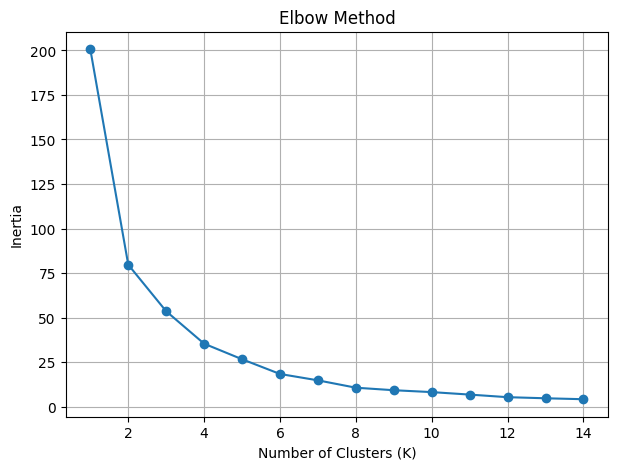

In [5]:
inertia_list = []
k_candidates = range(1, 15)

for k in k_candidates:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(k_candidates, inertia_list, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()


### 선택된 K값 기반 최종 클러스터링 결과 시각화

문제 1)  Elbow Method 결과를 참고하여 아래 코드의 빈칸에 가장 적절한 클러스터 개수 K를 입력하세요.

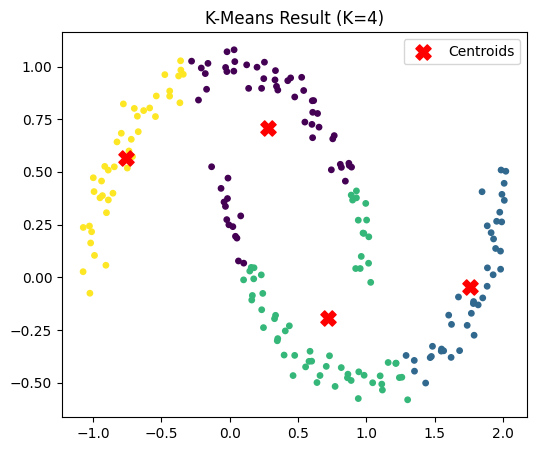

In [7]:
optimal_k = 4 # Elbow Method에서 관성 감소가 완만해지는 지점

kmeans_final = KMeans(n_clusters=optimal_k, random_state=0)
labels_kmeans = kmeans_final.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=15)
plt.scatter(
    kmeans_final.cluster_centers_[:, 0],
    kmeans_final.cluster_centers_[:, 1],
    c='red', s=120, marker='X', label='Centroids'
)
plt.title(f"K-Means Result (K={optimal_k})")
plt.legend()
plt.show()


### DBSCAN 클러스터링 결과 시각화

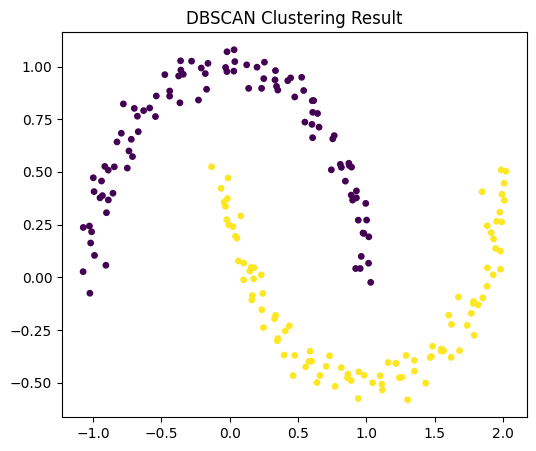

In [8]:
dbscan_model = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan_model.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=15)
plt.title("DBSCAN Clustering Result")
plt.show()


In [9]:
print("K-Means cluster count:", len(np.unique(labels_kmeans)))
print("DBSCAN cluster count (excluding noise):", len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0))
print("DBSCAN noise points:", np.sum(labels_dbscan == -1))


K-Means cluster count: 4
DBSCAN cluster count (excluding noise): 2
DBSCAN noise points: 0


문제 2) 알고리즘 적합성 판단
K-Means와 DBSCAN의 클러스터링 결과를 비교하세요. 두 결과 중 본 데이터 구조에 더 적합하다고 판단되는 알고리즘을 하나 선택하고 그 이유를 데이터의 형태와 알고리즘의 특성을 연결하여 설명하세요.

답변 : DBSCAN이 더 적합.

이유 한 줄 요약: 데이터가 비선형(두 개의 반달) 구조라 K-Means의 “볼록 분할” 가정이 깨지고, DBSCAN의 “밀도 기반/임의 형태 클러스터”가 구조를 그대로 잡아낸다.

# 과제2

 문제3) 아래 코드의 빈칸을 채워 PCA와 LDA 차원축소 과정을 완성하고 실행 결과를 확인하세요

In [10]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### 데이터 로드

In [11]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

print("데이터 shape:", X.shape)
print("클래스:", target_names)


데이터 shape: (150, 4)
클래스: ['setosa' 'versicolor' 'virginica']


### PCA 적용

In [13]:
pca = PCA(n_components=2)   #  PCA를 2차원으로 설정
X_pca = pca.fit(X).transform(X)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)


PCA explained variance ratio: [0.92461872 0.05306648]


### LDA 적용

In [14]:
lda = LinearDiscriminantAnalysis(n_components=2)  # LDA를 2차원으로 설정
X_lda = lda.fit(X, y).transform(X)   #  라벨 포함하여 학습 후 변환


### PCA 결과 시각화

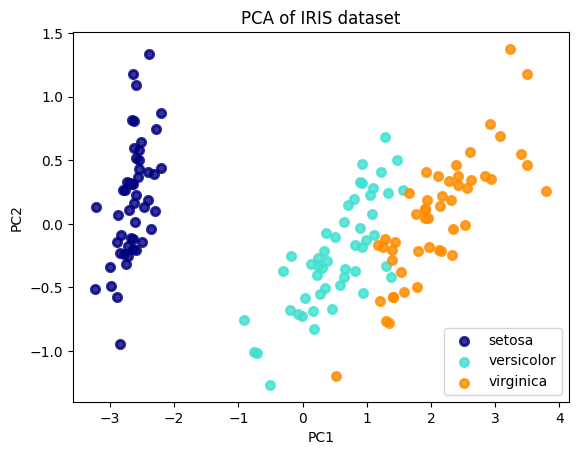

In [15]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        color=color,
        alpha=0.8,
        lw=lw,
        label=target_name,
    )

plt.legend(loc="best")
plt.title("PCA of IRIS dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### LDA 결과 시각화

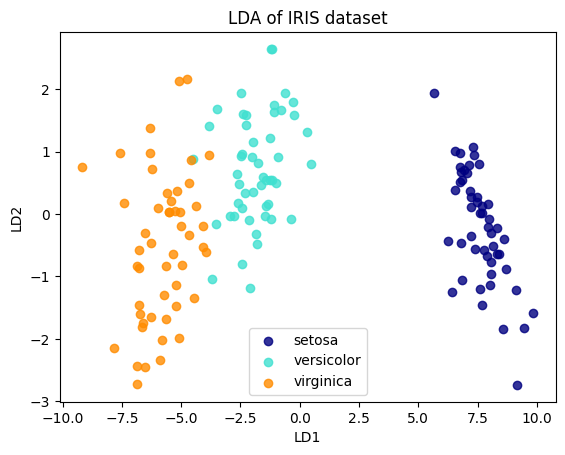

In [16]:
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_lda[y == i, 0],
        X_lda[y == i, 1],
        alpha=0.8,
        color=color,
        label=target_name,
    )

plt.legend(loc="best")
plt.title("LDA of IRIS dataset")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


문제4) 코드를 실행했을 때  LDA 시각화가 PCA 시각화보다 클래스 분리가 더 잘 나타나는 이유를 설명하세요.

답변:  

PCA는 라벨(y)을 전혀 쓰지 않는 비지도 차원축소라서, 데이터 전체에서 분산(variance)이 가장 큰 방향을 우선으로 축을 잡고, 그래서 “분산이 큰 방향 = 클래스가 잘 갈라지는 방향”이 아닐 수 있고, 특히 versicolor–virginica처럼 서로 겹치는 클래스는 PCA 공간에서 겹쳐 보이기 쉬움.  

LDA는 라벨(y)을 쓰는 지도 차원축소라서, 애초에 클래스 간 분리를 최대화하도록(정확히는 클래스 간 산포는 크게, 클래스 내 산포는 작게 되도록) 투영축을 찾는다. 그래서 같은 2차원으로 줄여도 클래스 경계가 더 선명해지는 게 자연스러움.
즉, PCA는 “정보(분산) 보존” 중심, LDA는 “분류(클래스 분리) 유리” 중심이기 때문